In [1]:
import pymongo 
from pymongo import MongoClient
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
client = MongoClient('34.253.72.184', 27017)
db = client.Audio
audio_collection = db.fft

In [3]:
results = audio_collection.find({'loc': 'Nimbus/Bot/1/Audio'}).limit(100).sort('time', pymongo.DESCENDING)

In [4]:
time = []
slices = []
for result in results:
    fft_result = [(r + i * 1j) for r, i in
    zip(result['complex']['real'], result['complex']['imag'])]
    slices.append(fft_result)
    time.append(result['time'])

spectrum = np.asarray(slices)
S = np.absolute(spectrum)
S = 20 * np.log10(S / np.max(S))

In [5]:
filtered = []
for s in S:
    if np.mean(s) < -100:
        print(f'Average: {np.mean(s)}')
        print(f'Shape {s.shape}')
        pass
    else:
        filtered.append(s)

Average: -103.73507209129924
Shape (4096,)


In [6]:
filtered = np.array(filtered)
S.shape, filtered.shape

((100, 4096), (99, 4096))

In [7]:
import matplotlib.pyplot as plt

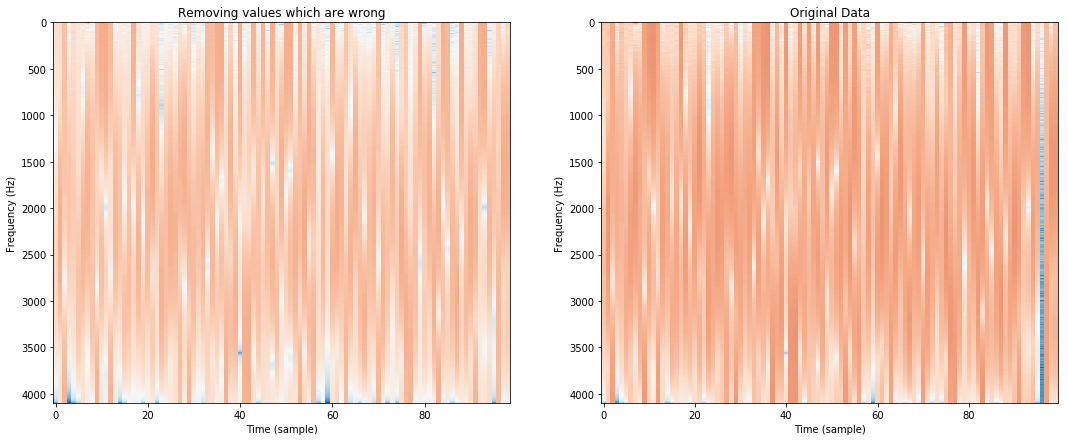

In [8]:
plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1)
plt.imshow(filtered.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Removing values which are wrong')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.subplot(1, 2, 2)
plt.imshow(S.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Original Data')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.show()

In [9]:
audio_collection.distinct('loc')

['Nimbus/Bot/1/Audio', 'Nimbus/Bot/2/Audio', 'Nimbus/Bot/filt1/Audio']

In [10]:
results = audio_collection.find({'loc': 'Nimbus/Bot/filt1/Audio'}).limit(100).sort('time', pymongo.DESCENDING)

In [11]:
time = []
slices = []
for result in results:
    fft_result = [(r + i * 1j) for r, i in
    zip(result['complex']['real'], result['complex']['imag'])]
    slices.append(fft_result)
    time.append(result['time'])

spectrum = np.asarray(slices)
S = np.absolute(spectrum)
S = 20 * np.log10(S / np.max(S))

In [12]:
filtered = []
for s in S:
    if np.mean(s) < -100:
        print(f'Average: {np.mean(s)}')
        print(f'Shape {s.shape}')
        pass
    else:
        filtered.append(s)

Average: -102.24817129720455
Shape (4096,)
Average: -104.96054669850099
Shape (4096,)
Average: -104.74105728639711
Shape (4096,)


In [13]:
filtered = np.array(filtered)
S.shape, filtered.shape

((100, 4096), (97, 4096))

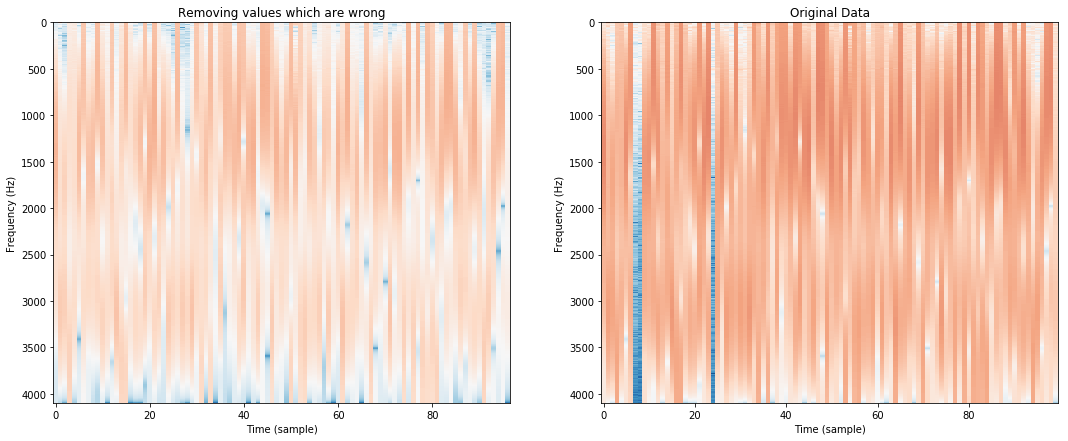

In [14]:
plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1)
plt.imshow(filtered.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Removing values which are wrong')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.subplot(1, 2, 2)
plt.imshow(S.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Original Data')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.show()

In [15]:
one = audio_collection.find({'loc': 'Nimbus/Bot/filt1/Audio'}).limit(5).sort('time', pymongo.DESCENDING)

In [16]:
time = []
slices = []
for result in one:
    fft_result = [(r + i * 1j) for r, i in
    zip(result['complex']['real'], result['complex']['imag'])]
    slices.append(fft_result)
    time.append(result['time'])
    print(result['time'])

spectrum = np.asarray(slices)
S = np.absolute(spectrum)
S = 20 * np.log10(S / np.max(S))

1529492080
1529492070
1529492060
1529492050
1529492040


In [17]:
count = audio_collection.find({'loc': 'Nimbus/Bot/filt1/Audio'}).count()
print(count)

6441


In [18]:
last_value = 1529492080
time_dif   = 10
skip       = 20

time_skip  = time_dif * skip 

values     = np.arange(last_value, last_value - 300 * time_skip, -time_skip) 

In [19]:
values

array([1529492080, 1529491880, 1529491680, 1529491480, 1529491280,
       1529491080, 1529490880, 1529490680, 1529490480, 1529490280,
       1529490080, 1529489880, 1529489680, 1529489480, 1529489280,
       1529489080, 1529488880, 1529488680, 1529488480, 1529488280,
       1529488080, 1529487880, 1529487680, 1529487480, 1529487280,
       1529487080, 1529486880, 1529486680, 1529486480, 1529486280,
       1529486080, 1529485880, 1529485680, 1529485480, 1529485280,
       1529485080, 1529484880, 1529484680, 1529484480, 1529484280,
       1529484080, 1529483880, 1529483680, 1529483480, 1529483280,
       1529483080, 1529482880, 1529482680, 1529482480, 1529482280,
       1529482080, 1529481880, 1529481680, 1529481480, 1529481280,
       1529481080, 1529480880, 1529480680, 1529480480, 1529480280,
       1529480080, 1529479880, 1529479680, 1529479480, 1529479280,
       1529479080, 1529478880, 1529478680, 1529478480, 1529478280,
       1529478080, 1529477880, 1529477680, 1529477480, 1529477

In [20]:
values[0] - values[1]

200

In [21]:
results = audio_collection.find({'loc' : 'Nimbus/Bot/filt1/Audio', 'time' : {'$in' : values.tolist()}}).sort('time', pymongo.DESCENDING)

In [22]:
time = []
slices = []
for result in results:
    fft_result = [(r + i * 1j) for r, i in
    zip(result['complex']['real'], result['complex']['imag'])]
    slices.append(fft_result)
    time.append(result['time'])

spectrum = np.asarray(slices)
S = np.absolute(spectrum)
S = 20 * np.log10(S / np.max(S))

In [23]:
filtered = []
for s in S:
    if np.mean(s) < -100:
        print(f'Average: {np.mean(s)}')
        print(f'Shape {s.shape}')
        pass
    else:
        filtered.append(s)
        
filtered = np.array(filtered)
S.shape, filtered.shape

Average: -103.20164939094869
Shape (4096,)
Average: -103.25374632547383
Shape (4096,)
Average: -104.95285757888918
Shape (4096,)
Average: -105.63288262255033
Shape (4096,)
Average: -104.89393296090293
Shape (4096,)
Average: -102.82747077914101
Shape (4096,)
Average: -104.94337978581
Shape (4096,)
Average: -103.82085515237024
Shape (4096,)
Average: -104.97853201489448
Shape (4096,)
Average: -103.4982089459402
Shape (4096,)


((300, 4096), (290, 4096))

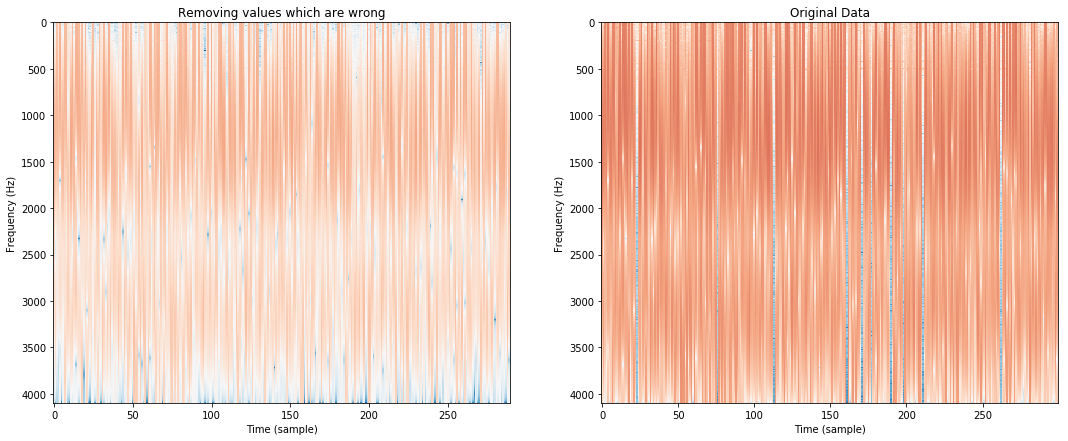

In [24]:
plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1)
plt.imshow(filtered.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Removing values which are wrong')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.subplot(1, 2, 2)
plt.imshow(S.T, aspect = 'auto', cmap = 'RdBu_r')
plt.title('Original Data')
plt.xlabel('Time (sample)')
plt.ylabel('Frequency (Hz)')

plt.show()

In [26]:
frequencies = np.arange(0, 22049, 5.38330078)
trace = go.Heatmap(x = time, y = frequencies, z = S.T, showscale = False)

layout = go.Layout(title = 'Spectrogram of Microphone',
                    xaxis = dict(title = 'Unix Time',
                    tickformat = 'f'),
                    yaxis = dict(title = 'Frequencies (kHz)'))

py.iplot(go.Figure(data = [trace], layout = layout), filename = 'plotly_test')

The draw time for this plot will be slow for all clients.


C:\Users\Thibault\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [27]:
frequencies = np.arange(0, 22049, 5.38330078)
trace = go.Heatmap(x = time, y = frequencies, z = filtered.T, showscale = False)

layout = go.Layout(title = 'Spectrogram of Microphone',
                    xaxis = dict(title = 'Unix Time',
                    tickformat = 'f'),
                    yaxis = dict(title = 'Frequencies (kHz)'))

py.iplot(go.Figure(data = [trace], layout = layout), filename = 'plotly_test')

The draw time for this plot will be slow for all clients.


C:\Users\Thibault\Anaconda3\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Too Long



In [ ]:
1529434500 1529490000 